In [1]:
# !git clone https://github.com/VaibhavYadav/pytorch_pix2code.git
# !git clone --single-branch --branch master https://github.com/Mohammad-Daaboul98/Web-Genrater-Dataset.git

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import pickle

In [4]:
data = {
'\n': 0,
'<START>': 1,
'<END>': 2,
'}': 3,
'{': 4,
',': 5,
' ': 6,
'header': 7,
'navbar-dark': 8,
'navbar-light': 9,
'navbar-primary': 10,
'navbar-warning': 11,
'navbar-danger': 12,
'navbar-secondary': 13,
'navbar-success': 14,
'navbar-brand': 15,
'navbar-toggler': 16,
'navbar-toggler-icon': 17,
'navbar-collapse': 18,
'navbar-nav': 19,
'nav-item': 20,
'nav-item-active': 21,
'nav-item-unactive': 22,
'nav-link': 23,
'nav-link-undisabled': 24,
'nav-link-disabled': 25,
'nav-link-active': 26,
'form-inline-success': 27,
'form-inline-danger': 28,
'form-inline-primary': 29,
'form-primary': 30,
'form-danger': 31,
'form-inline-secondary': 32,
'form-secondary': 33,
'form-inline-warning': 34,
'form-inline-dark': 35,
'form-dark': 36,
'form-inline-light': 37,
'from-d-flex': 38,
'form-control-me-2': 39,
'container-fluid': 40,
'container': 41,
'container-marketing': 42,
'main': 43,
'main-container':44,
'carousel-slide': 45,
'row': 46,
'col-lg-4': 47,
'col-md-7': 48,
'col-md-5': 49,
'order-md-2': 50,
'svg-140px': 51,
'svg-500px': 52,
'svg-250px': 53,
'svg': 54,
'h-1': 55,
'h-2': 56,
'h-3': 57,
'h-4': 58,
'h-5': 59,
'h-6': 60,
'h-span': 61,
'h-featurette': 62,
'paragraph': 63,
'paragraph-lead': 64,
'p-btn': 65,
'btn-primary': 66,
'btn-success': 67,
'btn-secondary': 68,
'btn-dark': 69,
'btn-warning': 70,
'btn-danger': 71,
'btn-outline-success': 72,
'btn-outline-danger': 73,
'btn-outline-dark': 74,
'featurette-divider': 75,
'br': 76,
'h5-my-0': 77,
'nav-my-2': 78,
'a-text-dark': 79,
'd-flex': 80,
'text-center': 81,
'card-deck': 82,
'card': 83,
'card-mb-4-shadow-sm': 84,
'card-header': 85,
'card-body': 86,
'card-title': 87,
'list-unstyled': 88,
'li': 89,
'btn-outline-primary': 90,
'album': 91,
'album-py-5-bg-light': 92,
'col-md-4': 93,    
'svg-bd-placeholder-img-card-img-top': 94,
'p-card-text': 95,
'd-flex-center': 96,
'btn-group': 97,
'btn-outline-secondary': 98,
'small-text-muted': 99,
'nav-item-dropdown': 100,
'nav-link-dropdown-toggle': 101,
'dropdown-menu': 102,
'dropdown-item': 103,
'form-inline': 104,
'jumbotron': 105,
'hr': 106,
'text-muted': 107,
'section-jumbotron-text-center': 108,
'justify-content-center': 109,
'align-items-center': 110,
'collapse-bg-dark': 111,
'col-sm-8-col-md-7-py-4': 112,
'col-sm-4-offset-md-1-py-4': 113,
'h-4-text-white': 114,
'paragraph-lead-text-muted': 115,
'list-unstyled-only': 116,
'a-text-white': 117,
'navbar-dark-bg-dark-shadow': 118,
'd-flex-justify-content-between': 119,
'navbar-toggler-icon-span': 120,
'a-navbar-brand-d-flex-align-items-center': 121,
'jumbotron-center': 122,
'h-jumbotron': 123,
'card-shadow': 124,
'paragraph-card-text': 125,
'card-img-top': 126,
'card-mb-4-shadow': 127,
'btn-outline-secondary-sm': 128,
'btn-primary-my-2': 129,
'btn-secondary-my-2': 130,
'navbar-collapse-dark': 131,
'navbar-collapse-primary': 132,
'navbar-collapse-success': 133,
'navbar-collapse-danger': 134,
'navbar-collapse-warning': 135,
'navbar-collapse-secondary': 136,
'navbar-collapse-light': 137,
'collapse-bg-primary': 138,
'collapse-bg-secondary': 139,
'collapse-bg-success': 140,
'collapse-bg-danger': 141,
'collapse-bg-info': 142,
'paragraph-lead-light': 143,
'navbar-dark-bg-primary-shadow': 144,
'navbar-dark-bg-secondary-shadow': 145,
'navbar-dark-bg-success-shadow': 146,
'navbar-dark-bg-danger-shadow': 147,
'navbar-dark-bg-info-shadow': 148,
'': 149
}

pickle.dump(data, open('voc.pkl' , 'wb'))

In [5]:
with open('/content/voc.pkl','rb') as f:
  data = pickle.load(f)

print(data)

{'\n': 0, '<START>': 1, '<END>': 2, '}': 3, '{': 4, ',': 5, ' ': 6, 'header': 7, 'navbar-dark': 8, 'navbar-light': 9, 'navbar-primary': 10, 'navbar-warning': 11, 'navbar-danger': 12, 'navbar-secondary': 13, 'navbar-success': 14, 'navbar-brand': 15, 'navbar-toggler': 16, 'navbar-toggler-icon': 17, 'navbar-collapse': 18, 'navbar-nav': 19, 'nav-item': 20, 'nav-item-active': 21, 'nav-item-unactive': 22, 'nav-link': 23, 'nav-link-undisabled': 24, 'nav-link-disabled': 25, 'nav-link-active': 26, 'form-inline-success': 27, 'form-inline-danger': 28, 'form-inline-primary': 29, 'form-primary': 30, 'form-danger': 31, 'form-inline-secondary': 32, 'form-secondary': 33, 'form-inline-warning': 34, 'form-inline-dark': 35, 'form-dark': 36, 'form-inline-light': 37, 'from-d-flex': 38, 'form-control-me-2': 39, 'container-fluid': 40, 'container': 41, 'container-marketing': 42, 'main': 43, 'main-container': 44, 'carousel-slide': 45, 'row': 46, 'col-lg-4': 47, 'col-md-7': 48, 'col-md-5': 49, 'order-md-2': 50,

In [6]:
class ImageEncoder(nn.Module):
    
    def __init__(self):
        super(ImageEncoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 64, 3)
        self.conv5 = nn.Conv2d(64, 128, 3)
        self.conv6 = nn.Conv2d(128, 128, 3)
        self.fc1 = nn.Linear(in_features=128*28*28, out_features=1024)
        self.fc2 = nn.Linear(in_features=1024, out_features=1024)

    def forward(self, x):
        # x -> [-1, 3, 256, 256]
        
        x = F.relu(self.conv1(x))
        # x -> [-1, 32, 254, 254]
        x = F.relu(self.conv2(x))
        # x -> [-1, 32, 252, 252]
        x = F.max_pool2d(x, 2)
        # x -> [-1, 32, 126, 126]
        
        x = F.relu(self.conv3(x))
        # x -> [-1, 64, 124, 124]
        x = F.relu(self.conv4(x))
        # x -> [-1, 64, 122, 122]
        x = F.max_pool2d(x, 2)
        # x -> [-1, 64, 61, 61]

        x = F.relu(self.conv5(x))
        # x -> [-1, 128, 59, 59]
        x = F.relu(self.conv6(x))
        # x -> [-1, 128, 57, 57]
        x = F.max_pool2d(x, 2)
        # x -> [-1, 128, 28, 28]

        x = x.view(-1, 128*28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

class ContextEncoder(nn.Module):

    def __init__(self):
        super(ContextEncoder, self).__init__()
        self.rnn = nn.RNN(input_size=150, hidden_size=128, num_layers=2, batch_first=True)
    
    def forward(self, x, h=None):
        # x -> [-1, seq_size, 19], h -> [num_layer=2,-1, 128]

        if not h:
            h = torch.zeros((2, x.size(0), 128)).cuda()

        x, _ = self.rnn(x, h)
        return x

class Decoder(nn.Module):

    def __init__(self):
        super(Decoder, self).__init__()
        self.rnn = nn.RNN(input_size=1024+128, hidden_size=512, num_layers=2, batch_first=True)
        self.l1 = nn.Linear(512, 150)
    
    def forward(self, image_feature, context_feature, on_cuda = False, h = None):
        # image_feature -> [-1, 1024], context_feature -> [-1, seq_size=48, 128], h -> [num_layer=2, -1, 512]
        image_feature = image_feature.unsqueeze(1)
        # image_feature -> [-1, 1, 1024]
        image_feature = image_feature.repeat(1, context_feature.size(1), 1)
        # image_feature -> [-1, seq_size, 1024]
        x = torch.cat((image_feature, context_feature), 2)
        # x -> [-1, seq_size=48, 1024+128]

        if not h:
            h = torch.zeros((2, x.size(0), 512)).cuda()

        x, _ = self.rnn(x, h)
        x = self.l1(x)
        # x = F.softmax(x, dim=1)
        return x

class Pix2Code(nn.Module):

    def __init__(self):
        super(Pix2Code, self).__init__()
        self.image_encoder = ImageEncoder()
        self.context_encoder = ContextEncoder()
        self.decoder = Decoder()

    def forward(self, image, context):
        image_feature = self.image_encoder(image)
        context_feature = self.context_encoder(context)
        output = self.decoder(image_feature, context_feature)
        return output


In [7]:
from torch.utils import data
import torchvision.transforms as transforms
import os

START_TOKEN = '<START>'
END_TOKEN = '<END>'
PLACEHOLDER = ' '
# CONTEXT_LENGTH = 48
image_size = 256


class Vocabulary:
    
    def __init__(self, file_path):
        self.load_vocab(file_path)
        self.length = len(self.vocab_to_index)
    
    def load_vocab(self, file_path):
        self.vocab_to_index = {}
        with open(file_path, 'rb') as vocab_file:
            self.vocab_to_index = pickle.load(vocab_file)
        self.index_to_vocab = {value:key for key, value in self.vocab_to_index.items()}
    
    def to_vec(self, word):
        vec = np.zeros(self.length)
        vec[self.vocab_to_index[word]] = 1
        return vec
       
    def to_vocab(self, index):
        return self.index_to_vocab[index]

class UIDataset(data.Dataset):
    
    def __init__(self, file_path, vocab_file_path):
        self.file_path = file_path
        self.paths = []
        self.get_paths()
        self.transform = transforms.Compose([
            transforms.Resize([image_size, image_size]),
            transforms.ToTensor(),
        ])
        self.vocab = Vocabulary(vocab_file_path)
        
    def get_paths(self):
        for f in os.listdir(self.file_path):
            if f.find('.gui') != -1:
                file_name = f[:f.find('.gui')]
                if os.path.isfile('{}/{}.png'.format(self.file_path, file_name)):
                    self.paths.append(file_name)
    
    def __len__(self):
        return(len(self.paths))
    
    def __getitem__(self, index):
        image = self.transform(Image.open('{}/{}.png'.format(self.file_path, self.paths[index])))[:-1]
        context, prediction = self.read_gui('{}/{}.gui'.format(self.file_path, self.paths[index]))
        return image, context, prediction
    
    def read_gui(self, file_path):
        context = []
        prediction = []
        
        # Tokenize the target code and ads start and end token
        token_sequence = [PLACEHOLDER]
        token_sequence.append(START_TOKEN)
        with open(file_path, 'r') as f:
            for line in f:
                line = line.replace(',', ' ,').replace('\n', ' \n')
                tokens = line.split(' ')
                for token in tokens:
                    token_sequence.append(token)
        token_sequence.append(END_TOKEN)
        
        # Generates cotext prediction pair
        context = token_sequence[:-1]
        prediction = token_sequence[1:]
        
        # suffix = [PLACEHOLDER] * CONTEXT_LENGTH
        # a = np.concatenate([suffix, token_sequence])
        # for j in range(len(token_sequence)):
        #     # context.append(a[j:j + CONTEXT_LENGTH])
        #     context.append(a[j])
        #     prediction.append(a[j + CONTEXT_LENGTH])
        
        # One hot encoding
        prediction_vec = []
        for word in prediction:
            prediction_vec.append(self.vocab.to_vec(word))
        context_vec = []
        for word in context:
            context_vec.append(self.vocab.to_vec(word))
        
        return torch.tensor(context_vec, dtype=torch.float), torch.tensor(prediction_vec, dtype=torch.float)

In [8]:
dataset = UIDataset('/content/drive/MyDrive/Senior/dataset/train', '/content/voc.pkl')

# Training

In [9]:
net = Pix2Code().cuda()
# net.load_state_dict(torch.load('/content/drive/MyDrive/Senior/pix2code.weights'))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0001)

In [ ]:
for epoch in range(10):
    net.zero_grad()
    for j, data in enumerate(dataset):
        image, context, prediction = data
        image = image.unsqueeze(0).cuda()
        context = context.unsqueeze(0).cuda()
        prediction = prediction.cuda()
        output = net(image, context)
        output = output.squeeze(0)
        prediction = torch.argmax(prediction, 1)
        loss = criterion(output, prediction)
        loss.backward()
        if j%10 == 0:
            optimizer.step()
            print('Loss: {}, Epoch: {}'.format(loss.data, epoch))
            net.zero_grad()

torch.save(net.state_dict(), './pix2code_10E.weights')

<ipython-input-7-66a3df498791>:93: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  return torch.tensor(context_vec, dtype=torch.float), torch.tensor(prediction_vec, dtype=torch.float)


Loss: 5.009607315063477, Epoch: 0
Loss: 4.900683879852295, Epoch: 0
Loss: 4.776477336883545, Epoch: 0
Loss: 4.583842754364014, Epoch: 0
Loss: 4.3156538009643555, Epoch: 0
Loss: 3.9292891025543213, Epoch: 0
Loss: 3.5900518894195557, Epoch: 0
Loss: 3.3005616664886475, Epoch: 0
Loss: 3.237410068511963, Epoch: 0
Loss: 3.1536269187927246, Epoch: 0
Loss: 3.1202759742736816, Epoch: 0
Loss: 2.9757041931152344, Epoch: 0
Loss: 2.8676867485046387, Epoch: 0
Loss: 2.8345115184783936, Epoch: 0
Loss: 2.7255942821502686, Epoch: 0
Loss: 2.7266812324523926, Epoch: 0
Loss: 2.7463724613189697, Epoch: 0
Loss: 2.7744944095611572, Epoch: 0
Loss: 2.705498218536377, Epoch: 0
Loss: 2.654867172241211, Epoch: 0
Loss: 2.7401812076568604, Epoch: 0
Loss: 2.6131672859191895, Epoch: 0
Loss: 2.634950637817383, Epoch: 0
Loss: 2.593686580657959, Epoch: 0
Loss: 2.636951446533203, Epoch: 0
Loss: 2.667710542678833, Epoch: 0
Loss: 2.613354444503784, Epoch: 0
Loss: 2.5534214973449707, Epoch: 0
Loss: 2.570624589920044, Epoch: 

In [11]:
!cp /content/pix2code_10E.weights /content/drive/MyDrive/Senior/pytorch_pix2code_weights/

# Testing

In [12]:
net = Pix2Code()
net.load_state_dict(torch.load('/content/pix2code_10E.weights'))
net.cuda().eval()

Pix2Code(
  (image_encoder): ImageEncoder(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (fc1): Linear(in_features=100352, out_features=1024, bias=True)
    (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (context_encoder): ContextEncoder(
    (rnn): RNN(150, 128, num_layers=2, batch_first=True)
  )
  (decoder): Decoder(
    (rnn): RNN(1152, 512, num_layers=2, batch_first=True)
    (l1): Linear(in_features=512, out_features=150, bias=True)
  )
)

In [13]:
# !mkdir /content/test
# !cp /content/drive/MyDrive/Senior/dataset/train/0.png /content/test
# !touch /content/test/0.gui

In [14]:
test_data = UIDataset('/content/drive/MyDrive/Senior/dataset/test', '/content/voc.pkl')
vocab = Vocabulary('/content/voc.pkl')

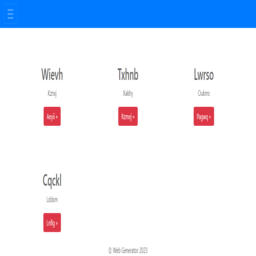

In [15]:
image, *_ = test_data.__getitem__(np.random.randint(len(test_data)))
t = transforms.ToPILImage()
image = image.unsqueeze(0)
t(image.squeeze())

In [16]:
image = image.cuda()
ct = []
ct.append(vocab.to_vec(' '))
ct.append(vocab.to_vec('<START>'))
output = ''
for i in range(200):
    context = torch.tensor(ct).unsqueeze(0).float().cuda()
    index = torch.argmax(net(image, context), 2).squeeze()[-1:].squeeze()
    v = vocab.to_vocab(int(index))
    if v == '<END>':
        break
    output += v
    ct.append(vocab.to_vec(v))

with open('./output.gui', 'w') as f:
    f.write(output)

print(output)

header{
container{
container{
col-md-4{
col-md-4{
h-2
paragraph
li
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}
}


Now from the compiler directory in your terminal run
`python web-compiler.py output.gui`.
This will generate a `output.html` file that you can open in your browser.